In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('iris.data')
train.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
new_row = pd.DataFrame({'5.1':5.1, '3.5':3.5, '1.4':3,
                        '0.2':0.2, 'Iris-setosa':'Iris-setosa'}, index =[0])
 
train = pd.concat([new_row, train[:]]).reset_index(drop = True)
train.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,5.1,3.5,3.0,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
cols = ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
train.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2, cols[3]:3, cols[4]:'Species'}, inplace=True)
train['distance'] = 1000
train.head()

,0,1,2,3,Species,distance
107,7.3,2.9,6.3,1.8,Iris-virginica,1000
105,7.6,3.0,6.6,2.1,Iris-virginica,1000
130,7.4,2.8,6.1,1.9,Iris-virginica,1000
102,7.1,3.0,5.9,2.1,Iris-virginica,1000
122,7.7,2.8,6.7,2.0,Iris-virginica,1000


In [22]:
target = pd.Series([6.9, 2.8, 6.6, 2.1])
target

0    6.9
1    2.8
2    6.6
3    2.1
dtype: float64

In [23]:
train['distance'] = ((train.loc[:,0]-target[0])**2 + (train.loc[:,1]-target[1])**2 + (train.loc[:,2]-target[2])**2 + (train.loc[:,3]-target[3])**2) ** 0.5
train.loc[::10]

,0,1,2,3,Species,distance
107,7.3,2.9,6.3,1.8,Iris-virginica,0.591608
135,7.7,3.0,6.1,2.3,Iris-virginica,0.984886
132,6.4,2.8,5.6,2.2,Iris-virginica,1.122497
115,6.4,3.2,5.3,2.3,Iris-virginica,1.462874
52,6.9,3.1,4.9,1.5,Iris-versicolor,1.827567
119,6.0,2.2,5.0,1.5,Iris-virginica,2.022375
63,6.1,2.9,4.7,1.4,Iris-versicolor,2.179449
74,6.4,2.9,4.3,1.3,Iris-versicolor,2.487971
94,5.6,2.7,4.2,1.3,Iris-versicolor,2.846050
69,5.6,2.5,3.9,1.1,Iris-versicolor,3.173326


In [24]:
k = 7
train = train.sort_values('distance', ascending=True)
knn = list(train.head(k).Species)
knn

['Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [25]:
from statistics import mode
print(mode(knn))

Iris-virginica


Text(0.5, 1.0, 'Iris Data Scatter Plot')

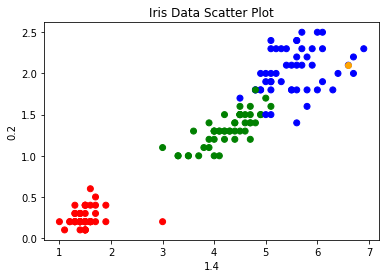

In [26]:
import matplotlib.pyplot as plt
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    train[2], 
    train[3], 
    c=train['Species'].map(colors))
plt.scatter(target[2], target[3], c='orange')
plt.xlabel(cols[2])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')